## Toxic Comment Classification


Description

The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.

In [4]:
import pandas as pd
import  re numpy as np, pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import nltk


#### Import Train and test

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
train.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1655,047b50906f8fa095,"""\n\nBut getting rid of the white stolen gener...",0,0,0,0,0,0
52709,8ce4149f64cf333f,Minor edits reminder \n\nThanks for your edit ...,0,0,0,0,0,0
21061,3794116ba7211a6d,"""\nWhat's wrong with it. this article deals wi...",0,0,0,0,0,0
48805,827c98b06342587f,"""Created disambig page because the previous re...",0,0,0,0,0,0
9309,18bc3c38a0e9e010,"Okay. So, we're talking about this book. You u...",0,0,0,0,0,0


In [37]:
test.sample(5)

,id,comment_text
106875,b258e21eafa3d43c,""" \n\n == Strutting down the street in arrogan..."
146954,f5a9dda5328d22c7,"October 2013 (UTC) \n :::::Haha, thanks for th..."
96568,a11d8fd50297d10a,"::Ah, I may even have a year of birth (1929). ..."
72470,78c48889c62e9ed9,""" \n\n Please stop. If you continue to introd..."
33902,385f86a712533d1e,== Revert of Joe Bageant == \n\n Why did you r...


total number of clean comments is, 143346 as percentage is  89.83211235124176


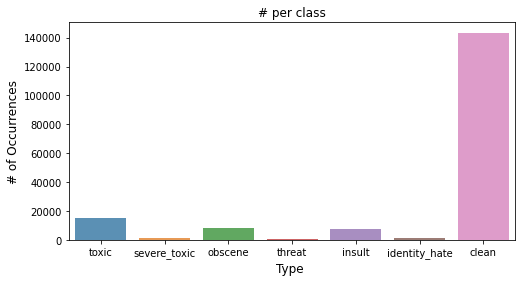

In [45]:
# x=train.iloc[:,2:].sum()
x= train.iloc[:,2:].sum(axis = 1)
train['clean'] = (x==0)
train['clean'] = train['clean'].astype(int)
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x = x.index,y= x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
# #adding the text labels
print("total number of clean comments is,",train['clean'].sum(axis = 0),"as percentage is ",float((train['clean'].sum(axis = 0))/train.shape[0]*100))

#### NUll values

In [46]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
clean            False
dtype: bool

In [47]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [49]:
import re

def decontracted(phrase):
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def text_preprocess(text): 
    
    # Emoticons
    text = text.replace(":/", " bad ")
    text = text.replace(":&gt;", " sad ")
    text = text.replace(":')", " sad ")
    text = text.replace(":-(", " frown ")
    text = text.replace(":(", " frown ")
    text = text.replace(":s", " frown ")
    text = text.replace(":-s", " frown ")
    text = text.replace("&lt;3", " heart ")
    text = text.replace(":d", " smile ")
    text = text.replace(":p", " smile ")
    text = text.replace(":dd", " smile ")
    text = text.replace("8)", " smile ")
    text = text.replace(":-)", " smile ")
    text = text.replace(":)", " smile ")
    text = text.replace(";)", " smile ")
    text = text.replace("(-:", " smile ")
    text = text.replace("(:", " smile ")
    text = text.replace(":/", " worry ")
    text = text.replace(":&gt;", " angry ")
    text = text.replace(":')", " sad ")
    text = text.replace(":-(", " sad ")
    text = text.replace(":(", " sad ")
    text = text.replace(":s", " sad ")
    text = text.replace(":-s", " sad ")
    text = text.replace("fu ck", "fuck")
    # Shortforms   
    text = re.sub(r'[\w]*don\'t[\w]*','do not',text)
    text = re.sub(r'[\w]*i\'ll[\w]*','i will',text)
    text = re.sub(r'[\w]*wasn\'t[\w]*','was not',text)
    text = re.sub(r'[\w]*there\'s[\w]*','there is',text)
    text = re.sub(r'[\w]*i\'m[\w]*','i am',text)
    text = re.sub(r'[\w]*won\'t[\w]*','will not',text)
    text = re.sub(r'[\w]*let\'s[\w]*','let us',text)
    text = re.sub(r'[\w]*i\'d[\w]*','i would',text)
    text = re.sub(r'[\w]*they\'re[\w]*','they are',text)
    text = re.sub(r'[\w]*haven\'t[\w]*','have not',text)
    text = re.sub(r'[\w]*that\'s[\w]*','that is',text)
    text = re.sub(r'[\w]*couldn\'t[\w]*','could not',text)
    text = re.sub(r'[\w]*aren\'t[\w]*','are not',text)
    text = re.sub(r'[\w]*wouldn\'t[\w]*','would not',text)
    text = re.sub(r'[\w]*you\'ve[\w]*','you have',text)
    text = re.sub(r'[\w]*you\'ll[\w]*','you will',text)
    text = re.sub(r'[\w]*what\'s[\w]*','what is',text)
    text = re.sub(r'[\w]*we\'re[\w]*','we are',text)
    text = re.sub(r'[\w]*doesn\'t[\w]*','does not',text)
    text = re.sub(r'[\w]*can\'t[\w]*','can not',text)
    text = re.sub(r'[\w]*shouldn\'t[\w]*','should not',text)
    text = re.sub(r'[\w]*didn\'t[\w]*','did not',text)
    text = re.sub(r'[\w]*here\'s[\w]*','here is',text)
    text = re.sub(r'[\w]*you\'d[\w]*','you would',text)
    text = re.sub(r'[\w]*he\'s[\w]*','he is',text)
    text = re.sub(r'[\w]*she\'s[\w]*','she is',text)
    text = re.sub(r'[\w]*weren\'t[\w]*','were not',text)
    
    
    # Remove punct except ! and ?
    text = re.sub(r"[,.:|(;@)-/^—#&%$<=>`~{}\[\]\'\"]+\ *", " ", text)
    # Separate out ! and ?
    text = re.sub("!", " ! ", text)
    text = re.sub("\?", " ? ", text)
  
    # Drop numbers
    text = re.sub("\\d+", " ", text)
        
    # Convert to lower
    text = text.lower()
    
    # Lots of words are not present in the fasttext embeddings. Replace them
    text = re.sub(r'[\w]*(fuc|fck|fvc|fuk|fucd)[\w]*','fuck',text)
    text = re.sub(r'[\w]*fag[\w]*','gay',text)
    text = re.sub(r'[\w]*gay[\w]*','gay',text)
    text = re.sub(r'[\w]*peni[\w]*','dick',text)
    text = re.sub(r'[\w]*(dic|dik)[\w]*','dick',text)
    text = re.sub(r'[\w]*bi[\w]*ch[\w]*','bitch',text)
    text = re.sub(r'[\w]*s[\w]*x[\w]*','sex',text)
    text = re.sub(r'[\w]*s[\w]*k[\w]*','suck',text)
    text = re.sub(r'[\w]*nigg[\w]*','suck',text)
    text = re.sub(r'[\w]*cock[\w]*','dick',text)
    text = re.sub(r'[\w]*cunt[\w]*','cunt',text)
    text = re.sub(r'[\w]*anal[\w]*','anal',text)
    text = re.sub(r'[\w]*ha{2,}[\w]*','haha',text)
    text = re.sub(r'[\w]*haha[\w]*','haha',text)
    text = re.sub(r'[\w]*wiki[\w]*','wikipedia',text)
    text = re.sub(r'[\w]*ency[\w]ia[\w]*','encyclopedia',text)   
           
    # Remove unwanted space
    text = " ".join(text.split())

    return text

## Clean train

In [53]:
# from nltk.corpus import stopwords
# stopwords.words("english")
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [54]:
from tqdm import tqdm

clean_text_train = []
for txt in tqdm(train['comment_text'].values):
    sent = text_preprocess(txt)
    sent = re.sub('[^A-Za-z0-9]+',' ', sent)

    sent = ' '.join(e for e in sent.split() if e not in stopwords and len(e)>1)
    clean_text_train.append(sent.lower().strip())

100%|██████████| 159571/159571 [02:56<00:00, 903.76it/s] 


In [55]:
clean_text_test = []

for i in tqdm(test['comment_text'].values):
    sent = text_preprocess(i)
    sent = re.sub('[^A-Za-z0-9]+',' ', sent)



    sent = ' '.join(e for e in sent.split() if e not in stopwords and len(e)>1)
    clean_text_test.append(sent.lower().strip())

100%|██████████| 153164/153164 [02:36<00:00, 980.16it/s] 


In [62]:
train['comment_text'] = clean_text_train
test['comment_text'] = clean_text_test

In [63]:
train.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,1
1,1,000103f0d9cfb60f,aww matches background colour seemingly suck t...,0,0,0,0,0,0,1
2,2,000113f07ec002fd,hey man really not trying edit war guy constan...,0,0,0,0,0,0,1
3,3,0001b41b1c6bb37e,not make real suggestions improvement wondered...,0,0,0,0,0,0,1
4,4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,1


In [64]:
test.head()

,Unnamed: 0,id,comment_text
0,0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...
1,1,0000247867823ef7,rfc title fine imo
2,2,00013b17ad220c46,sources zawe ashton lapland
3,3,00017563c3f7919a,look back source information updated correct f...
4,4,00017695ad8997eb,not anonymously edit articles


In [59]:
### save the file
train.to_csv("train_processed.csv",index=False)
test.to_csv("test_processed.csv", index=False)

In [60]:
### Load the files
train = pd.read_csv("train_processed.csv")
test = pd.read_csv("test_processed.csv")

In [61]:
train.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,1
1,1,000103f0d9cfb60f,aww matches background colour seemingly suck t...,0,0,0,0,0,0,1
2,2,000113f07ec002fd,hey man really not trying edit war guy constan...,0,0,0,0,0,0,1
3,3,0001b41b1c6bb37e,not make real suggestions improvement wondered...,0,0,0,0,0,0,1
4,4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,1


In [91]:
train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
test.drop(['Unnamed: 0','id'],axis=1,inplace = True)

### Featurizing the text datas
1. TfIDF (ngrams)
2. WORD2VEC
3. One hot encoding

In [108]:
from sklearn.model_selection import train_test_split

x_train,x_test = train_test_split(train, test_size=0.4, shuffle=True)
x_train, x_val = train_test_split(x_train, test_size=0.4, shuffle=True)

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000)
tfidf.fit(x_train.comment_text.values)
train_x = tfidf.transform(x_train.comment_text.values)
val_x = tfidf.transform(x_val.comment_text.values)

In [113]:
train_x.shape, val_x.shape

((57445, 2000), (38297, 2000))

In [161]:
test_x = tfidf.transform(x_test.comment_text.values)

In [131]:
y_train = x_train.iloc[:,1:].values
y_test = x_test.iloc[:,1:].values
y_val = x_val.iloc[:,1:].values

In [133]:
### defining the model 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
ovr = OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)




In [135]:
predictor = ovr.fit(train_x,y_train)

In [138]:
predicted_val = predictor.predict(val_x)

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predicted_val)

0.914901950544429

In [165]:
predictor_test = predictor.predict(test_x)
accuracy_score(y_test, predictor_test)

0.9125005875072459

In [167]:
import joblib
joblib.dump(ovr,"oneverreastlog.sav")

['oneverreastlog.sav']

In [169]:
loaded_model = joblib.load('oneverreastlog.sav')

In [174]:
loaded_model.predict(test_x)[100:200]

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0,

In [176]:
y_test[100:200]

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0,

In [177]:
joblib.dump(tfidf,"tfidfvectorizer.sav")

['tfidfvectorizer.sav']

In [183]:
test.loc[0].values

array(['yo bitch ja rule succesful ever whats hating sad fuck bitch slap ur dick white faces get kiss ass guys suck ja rule pride da music man dont diss shit nothin wrong bein like tupac brother fuck white boys get things right next time'],
      dtype=object)

In [184]:
tf = joblib.load("tfidfvectorizer.sav")

In [202]:
loaded_model.predict((tf.transform(test.loc[0].values).A))

array([[1, 0, 1, 0, 1, 0, 0]])

In [209]:
x_train.iloc[:,1:].columns.values

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'clean'], dtype=object)